In [340]:
#Import the standard libraries that are required for reading data and analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR

import statsmodels 
from statsmodels import api as sm
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [341]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width', None)

# Data Reading and Understanding

In [342]:
housing = pd.read_csv('train.csv')

In [343]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [344]:
housing.shape

(1460, 81)

In [345]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [346]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Data Cleaning 

In [347]:
## Let us check if any column has only one unique value(Excluding null)


null_col_list = list(housing.columns[housing.nunique() == 1])
print(null_col_list)
print(len(null_col_list))

[]
0


<b><u>Observation:</b></u>
There are no columns which have null for all the rows. 




In [348]:
nullp = housing.isnull().sum()/len(housing)
print(nullp)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

<b><u>Observation:</b></u>
- There are few columns which have high percentrage of null values. 
- Let us remove columns having more than 80% null values. 
  - Alley 
  - MiscFeature
  - PoolQC
  - Fence




In [349]:

housing.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [350]:
housing.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [351]:
     
housing.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [352]:
housing = housing.drop(housing.columns[housing.apply(lambda col: col.isnull().sum()/len(housing) > 0.80)], axis=1)

In [353]:
housing.shape

(1460, 77)

In [354]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

<b><u>Observation:</b></u>
- There are few columns having null values for few rows. 
- Let us impute the missing values for each such columns 

In [355]:
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [356]:
housing.LotFrontage.median()

69.0

<b><u>Observation:</b></u>

LotFrontage and MasVndArea are numeric variables.So, let us impute the missing values with median.



In [357]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())


In [358]:
housing.LotFrontage.isnull().sum()

0

In [359]:
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [360]:
housing['BsmtQual'] = housing['BsmtQual'].fillna(housing['BsmtQual'].mode()[0])

In [361]:
housing.BsmtQual.isnull().sum()

0

In [362]:
housing.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [363]:
housing['BsmtCond'] = housing['BsmtCond'].fillna(housing['BsmtCond'].mode()[0])

In [364]:
housing.BsmtCond.isnull().sum()

0

In [365]:
housing.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<b><u>Observation:</b></u>

BsmtExposure is categorical variable.So, let us impute the missing values with mode.

In [366]:
housing['BsmtExposure'] = housing['BsmtExposure'].fillna(housing['BsmtExposure'].mode()[0])

In [367]:
housing.BsmtExposure.isnull().sum()

0

In [368]:
housing.BsmtFinType1.value_counts()



Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [369]:
housing.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [370]:
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna(housing['BsmtFinType1'].mode()[0])
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna(housing['BsmtFinType2'].mode()[0])


In [371]:
housing.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<b><u>Observation:</b></u>

Below variables are categorical variables.So, let us impute the missing values with mode.
- Electrical
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond

In [372]:
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['FireplaceQu'] = housing['FireplaceQu'].fillna(housing['FireplaceQu'].mode()[0])
housing['GarageType'] = housing['GarageType'].fillna(housing['GarageType'].mode()[0])
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mode()[0])
housing['GarageFinish'] = housing['GarageFinish'].fillna(housing['GarageFinish'].mode()[0])
housing['GarageQual'] = housing['GarageQual'].fillna(housing['GarageQual'].mode()[0])
housing['GarageCond'] = housing['GarageCond'].fillna(housing['GarageCond'].mode()[0])



In [373]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [374]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [375]:
housing.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<b><u>Observation:</b></u>

Below variables are in year. Better indicator would be to calculate the age of the built,garage built age etc
- YearBuilt
- YearRemodAdd
- GarageYrBlt



In [376]:
current_year = (pd.datetime.now().year)
housing['age'] =  housing['YearBuilt'].apply(lambda year: current_year-year)
housing['remod_age'] =  housing['YearRemodAdd'].apply(lambda year: current_year-year)
housing['Garage_age'] =  housing['GarageYrBlt'].apply(lambda year: current_year-year)


In [377]:
housing = housing.drop(['YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1)

In [378]:
housing[list(housing.dtypes[housing.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [379]:
housing.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [380]:

housing[['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual']].head()

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual
0,Gtl,7,5,Gd,TA,Gd,TA,No,Unf,Ex,Gd,Gd,RFn,TA
1,Gtl,6,8,TA,TA,Gd,TA,Gd,Unf,Ex,TA,TA,RFn,TA
2,Gtl,7,5,Gd,TA,Gd,TA,Mn,Unf,Ex,Gd,TA,RFn,TA
3,Gtl,7,5,TA,TA,TA,Gd,No,Unf,Gd,Gd,Gd,Unf,TA
4,Gtl,8,5,Gd,TA,Gd,TA,Av,Unf,Ex,Gd,TA,RFn,TA


<b><u>Observation:</b></u>

Analysing the fields, we find the belwo fields are ordinal in nature. They are natural order in the data. So, we can use one hot encoding to represent these fields. 

- LandSlope
- ExterQual
- ExterCond
- HeatingQC
- KitchenQual
- BsmtQual
- BsmtCond
- FireplaceQu
- GarageQual
- GarageCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageFinish
- PavedDrive
- LotShape

In [381]:
housing['LandSlope'] = housing.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing['ExterQual'] = housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['HeatingQC'] = housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['KitchenQual'] = housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


housing['BsmtQual'] = housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['FireplaceQu'] = housing.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageQual'] = housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})



housing['BsmtExposure'] = housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})

housing['BsmtFinType1'] = housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

housing['BsmtFinType2'] = housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

housing['GarageFinish'] = housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing['PavedDrive'] = housing.PavedDrive.map({'N':0,'P':1,'Y':2})

housing['LotShape'] = housing.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})




#housing['Fence'] = housing['Fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
#housing['Fence'] = housing['Fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})





In [382]:
housing[['LandSlope','LotShape','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','PavedDrive']].head()

,LandSlope,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,PavedDrive
0,0,0,7,5,3,2,4,3,1,1,4,3,4,2,3,2
1,0,0,6,8,2,2,4,3,4,1,4,2,3,2,3,2
2,0,1,7,5,3,2,4,3,2,1,4,3,3,2,3,2
3,0,1,7,5,2,2,3,4,1,1,3,3,4,1,3,2
4,0,1,8,5,3,2,4,3,3,1,4,3,3,2,3,2


<b><u>Observation:</b></u>

Analysing the fields, we find the belwo fields are categorical in nature. 
We will use dummy variables to represent the below fields. 
- MSZoning
- Street
- LandContour
- Utilities
- LotConfig
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- SaleType
- SaleCondition

In [383]:
dummy_vars = pd.get_dummies(housing[['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','SaleType','SaleCondition']],drop_first=True)

In [384]:
housing = pd.concat([housing,dummy_vars],axis=1)
housing = housing.drop(['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','SaleType','SaleCondition'],axis=1)

In [385]:
# The field Id is serial number and doesnt add any value to the analysis. 
# So we are dropping the field.
housing = housing.drop(['Id'],axis=1)

In [386]:
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,4,2,2,548,3,3,2,0,61,0,0,0,0,0,2,2008,208500,18,18,18.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,3,2,298,0,0,0,0,0,0,5,2007,181500,45,45,45.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

# Extrapolatory Data Analysis

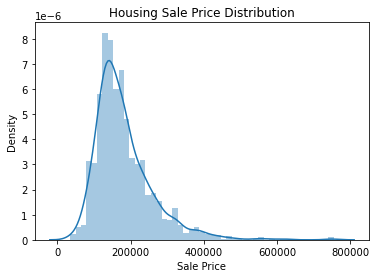

In [387]:
sns.distplot(housing.SalePrice)
plt.title('Housing Sale Price Distribution')
plt.xlabel('Sale Price')
plt.show()

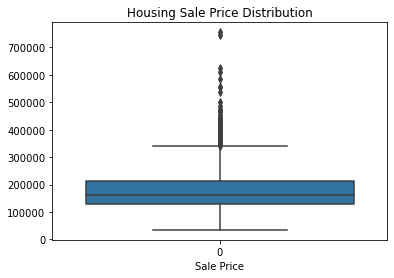

In [388]:
sns.boxplot(data=housing.SalePrice)
plt.title('Housing Sale Price Distribution')
plt.xlabel('Sale Price')
plt.show()

<b><u>Observation:</b></u>

The mean of sale price is around 2000000 with some outliers.

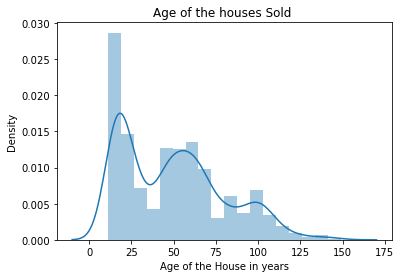

In [389]:
sns.distplot(housing.age)
plt.title('Age of the houses Sold ')
plt.xlabel('Age of the House in years')
plt.show()


<b><u>Observation:</b></u>

Majority of the houses sold are around 20 years. There are very few houses that are more than 100 years old. 


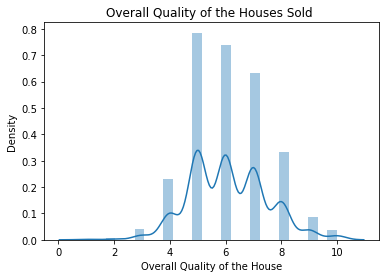

In [390]:
sns.distplot(housing['OverallQual'])
plt.title('Overall Quality of the Houses Sold ')
plt.xlabel('Overall Quality of the House')
plt.show()


<b><u>Observation:</b></u>

Majority of the houses sold are of 5(Average) and 6(Above Average) quality . 


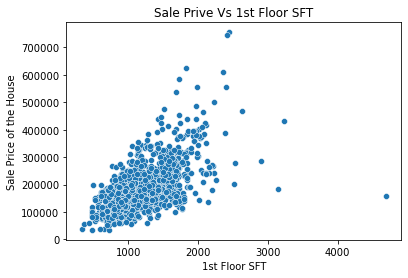

In [391]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=housing)
plt.title('Sale Prive Vs 1st Floor SFT')
plt.xlabel('1st Floor SFT')
plt.ylabel('Sale Price of the House')
plt.show()


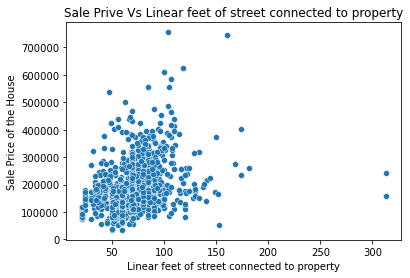

In [392]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=housing)
plt.title('Sale Prive Vs Linear feet of street connected to property')
plt.xlabel('Linear feet of street connected to property')
plt.ylabel('Sale Price of the House')
plt.show()

<b><u>Observation:</b></u>

The Sale price of the house is fairly linear with the area of street connected to the property.


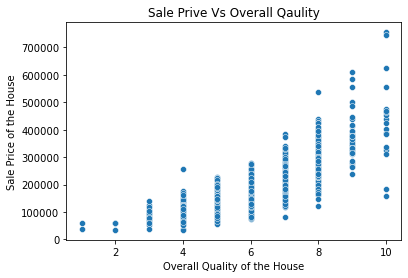

In [393]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=housing)
plt.title('Sale Prive Vs Overall Qaulity')
plt.xlabel('Overall Quality of the House')
plt.ylabel('Sale Price of the House')
plt.show()

<b><u>Observations:</b></u>

In general, the higher the ovberall quality, higher the sale price. 

With 10 (Very Excellent) fetching higher Sale prices.


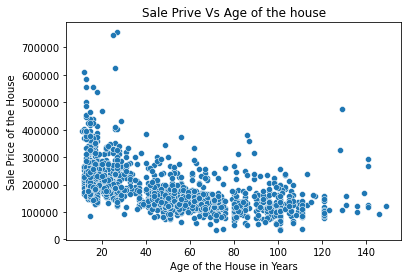

In [394]:
sns.scatterplot(x='age', y='SalePrice', data=housing)
plt.title('Sale Prive Vs Age of the house')
plt.xlabel('Age of the House in Years')
plt.ylabel('Sale Price of the House')
plt.show()


<b><u>Observations:</b></u>

In general, there are more sales in newer houses compared to old ones. 

With houses less than or equal to 20 years fetching better prices. 


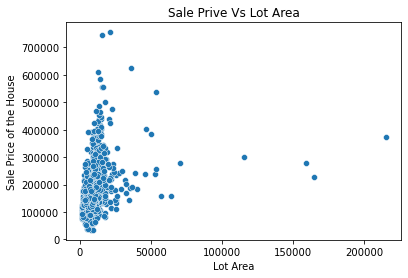

In [395]:
sns.scatterplot(x='LotArea', y='SalePrice', data=housing)
plt.title('Sale Prive Vs Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price of the House')
plt.show()


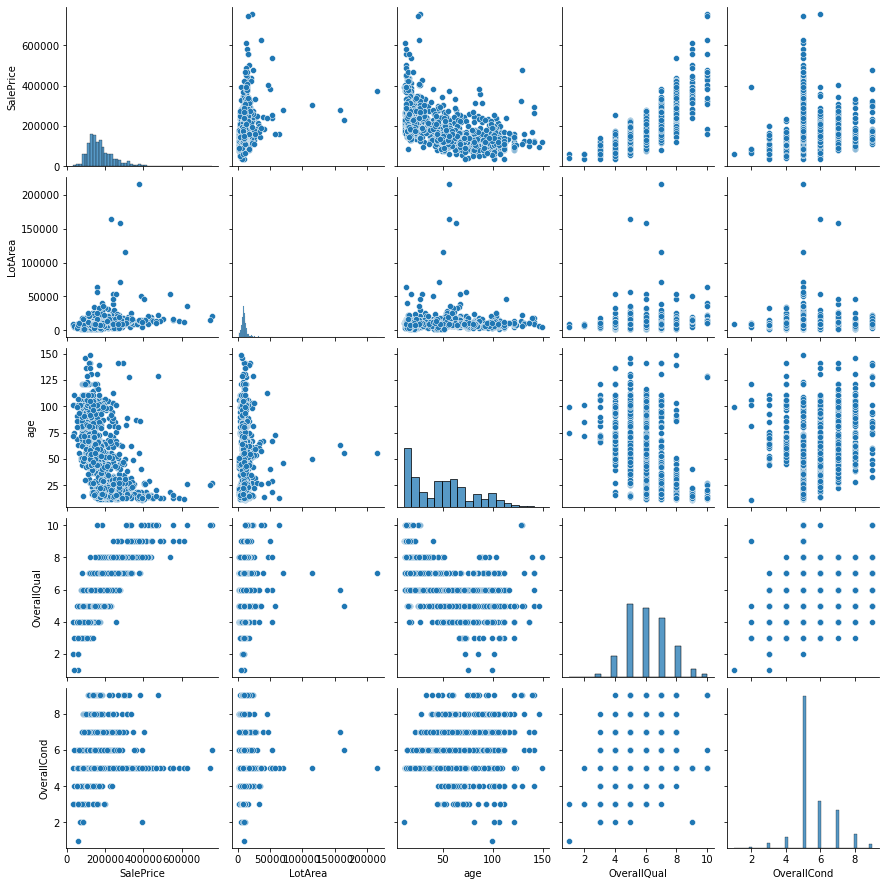

In [396]:
sns.pairplot(housing[['SalePrice','LotArea','age','OverallQual','OverallCond']])

# Regression Analysis

In [397]:
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,4,2,2,548,3,3,2,0,61,0,0,0,0,0,2,2008,208500,18,18,18.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,3,2,298,0,0,0,0,0,0,5,2007,181500,45,45,45.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [398]:
housing_train,housing_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

In [399]:
scaler = MinMaxScaler()

In [400]:
## Numerical continuous variables are scaled to values between 0 and 1.
num_vars = ['MSSubClass'
,'LotFrontage'
,'LotArea'
,'LotShape'
,'LandSlope'
,'OverallQual'
,'OverallCond'
,'MasVnrArea'
,'ExterQual'
,'ExterCond'
,'BsmtQual'
,'BsmtCond'
,'BsmtExposure'
,'BsmtFinType1'
,'BsmtFinSF1'
,'BsmtFinType2'
,'BsmtFinSF2'
,'BsmtUnfSF'
,'TotalBsmtSF'
,'HeatingQC'
,'1stFlrSF'
,'2ndFlrSF'
,'LowQualFinSF'
,'GrLivArea'
,'BsmtFullBath'
,'BsmtHalfBath'
,'FullBath'
,'HalfBath'
,'BedroomAbvGr'
,'KitchenAbvGr'
,'KitchenQual'
,'TotRmsAbvGrd'
,'Fireplaces'
,'FireplaceQu'
,'GarageFinish'
,'GarageCars'
,'GarageArea'
,'GarageQual'
,'GarageCond'
,'PavedDrive'
,'WoodDeckSF'
,'OpenPorchSF'
,'EnclosedPorch'
,'3SsnPorch'
,'ScreenPorch'
,'PoolArea'
,'MiscVal'
,'MoSold'
,'YrSold'
,'SalePrice'
,'age'
,'remod_age'
,'Garage_age']

housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])
housing_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.0,0.0,0.444444,0.625,0.00,0.333333,0.333333,0.333333,0.666667,0.0,0.4,0.082920,0.0,0.0,0.169521,0.141408,0.50,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,0.000000,0.75,0.0,0.00,0.000000,0.50,0.5,1.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.272727,0.50,0.087627,0.615942,1.000000,0.045455,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.236301,0.039403,0.0,0.5,0.666667,0.500,0.16,0.666667,0.333333,0.666667,0.666667,1.0,1.0,0.174876,0.0,0.0,0.154110,0.220458,1.00,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.66

In [401]:
housing_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.0,0.0,0.444444,0.625,0.00,0.333333,0.333333,0.333333,0.666667,0.0,0.4,0.082920,0.0,0.0,0.169521,0.141408,0.50,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,0.000000,0.75,0.0,0.00,0.000000,0.50,0.5,1.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.272727,0.50,0.087627,0.615942,1.000000,0.045455,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.236301,0.039403,0.0,0.5,0.666667,0.500,0.16,0.666667,0.333333,0.666667,0.666667,1.0,1.0,0.174876,0.0,0.0,0.154110,0.220458,1.00,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.66

In [402]:
housing_test[num_vars] = scaler.transform(housing_test[num_vars])
housing_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.000000,0.0,0.333333,0.625,0.00000,0.333333,0.333333,0.333333,0.666667,0.000000,0.8,0.109142,0.0,0.0,0.106164,0.141408,0.50,0.113889,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.333333,0.181818,0.000000,0.75,0.0,0.50,0.372355,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.25,0.118872,0.282609,0.650000,0.327273,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.235294,0.232877,0.047566,0.333333,0.0,0.666667,0.500,0.00000,0.666667,0.333333,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.368151,0.140753,1.00,0.112963,0.416465,0.0,0.246349,0.000000,0.0,0.

In [403]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train


In [404]:
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [405]:
X_train.shape

(1021, 198)

In [406]:
X_test.shape

(438, 198)

### Let us Use RFE for shortlisting feature 

In [407]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,30)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [408]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,age,remod_age,Garage_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

In [409]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns=['Column_Names','Status','Rank']

In [410]:
rfe_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [411]:
rfe_scores.sort_values(['Rank'],ascending=True)

,Column_Names,Status,Rank
23,GrLivArea,True,1
128,Exterior1st_BrkComm,True,1
29,KitchenAbvGr,True,1
28,BedroomAbvGr,True,1
124,RoofMatl_Tar&Grv,True,1
136,Exterior1st_Stone,True,1
123,RoofMatl_Roll,True,1
45,PoolArea,True,1
122,RoofMatl_Metal,True,1
21,2ndFlrSF,True,1


In [412]:
rfe_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'PoolArea',
 'Condition2_PosN',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_Stone',
 'Exterior2nd_Stone',
 'Foundation_Slab',
 'Heating_OthW',
 'Functional_Sev',
 'SaleType_Con']

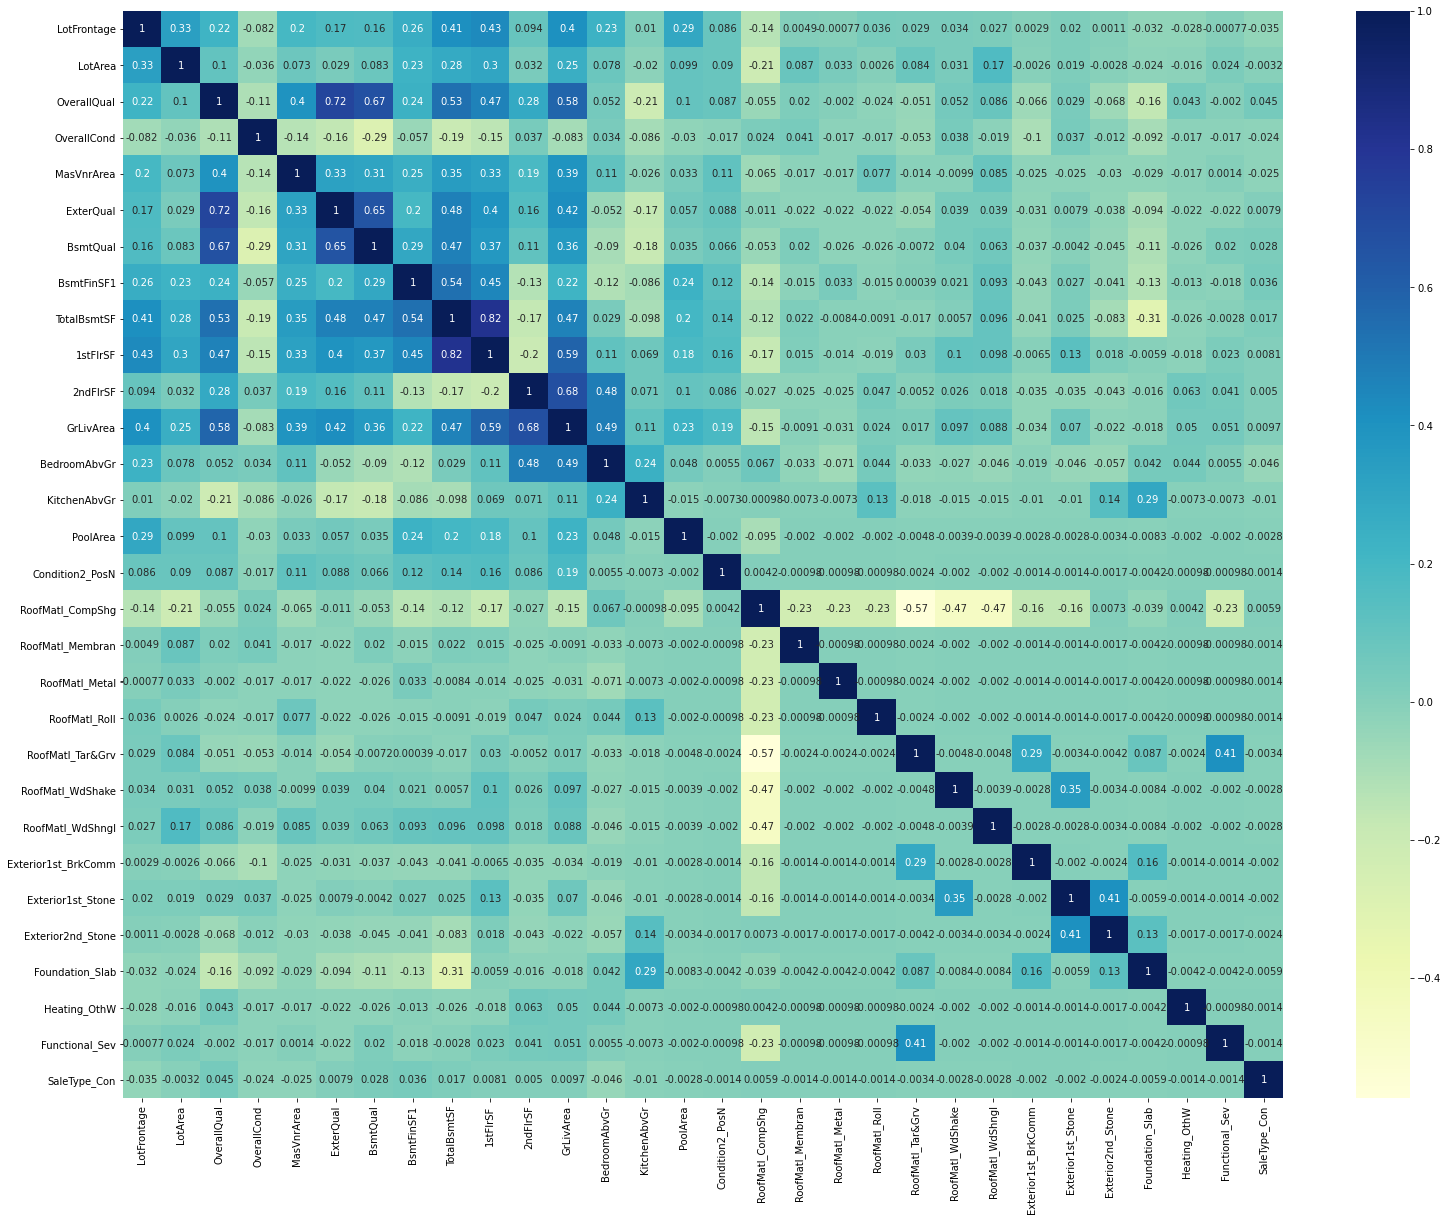

In [413]:
X_train_1 = X_train[rfe_columns]
plt.figure(figsize = (26, 20))
sns.heatmap(X_train_1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [414]:
X_test_1 = X_test[rfe_columns]

In [415]:
X_test_1.shape

(438, 30)

In [416]:
X_train_1 = X_train_1.drop(['ExterQual','TotalBsmtSF','GrLivArea'],axis=1)
X_test_1 = X_test_1.drop(['ExterQual','TotalBsmtSF','GrLivArea'],axis=1)



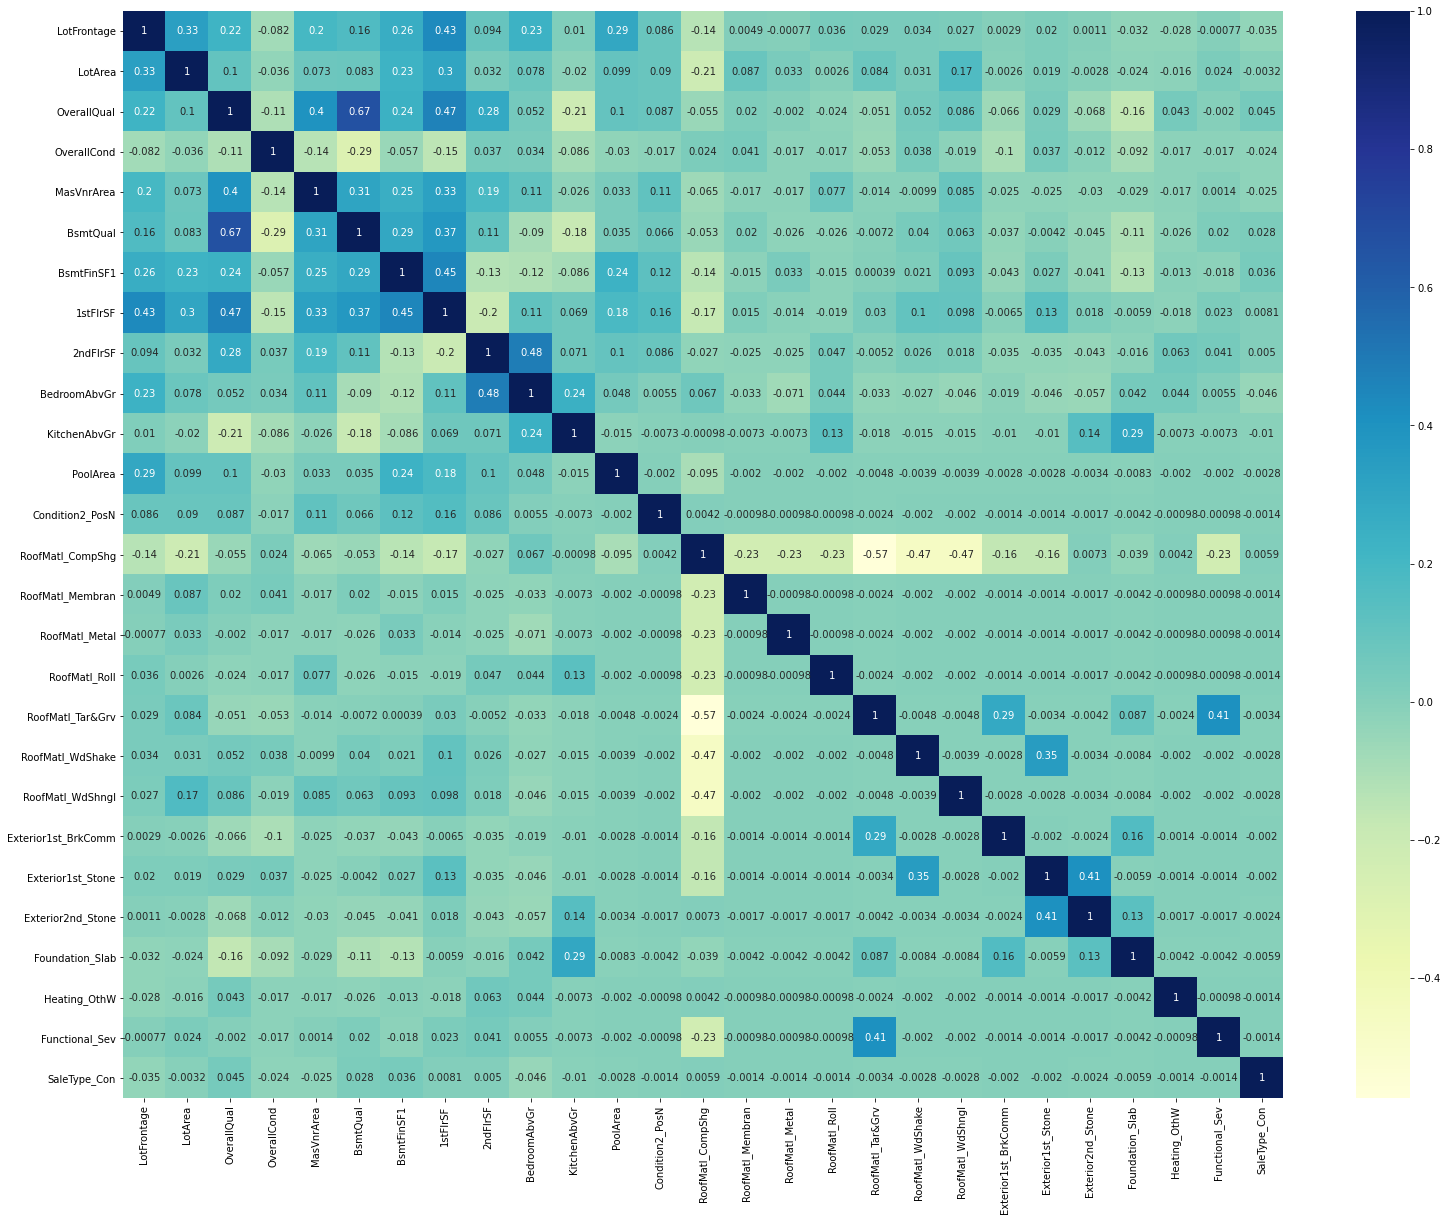

In [417]:

plt.figure(figsize = (26, 20))
sns.heatmap(X_train_1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [418]:
X_train_1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinSF1,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,Condition2_PosN,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_Stone,Exterior2nd_Stone,Foundation_Slab,Heating_OthW,Functional_Sev,SaleType_Con
210,0.157534,0.019306,0.444444,0.625,0.00,0.333333,0.082920,0.113889,0.000000,0.250,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.174876,0.231481,0.616949,0.500,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.016655,0.098611,0.333656,0.375,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
986,0.130137,0.017931,0.555556,0.875,0.00,0.333333,0.000000,0.145602,0.307022,0.250,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.333333,0.000000,0.202315,0.505569,0.500,0.5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [419]:
normal_reg = LinearRegression() 
normal_reg.fit(X_train_1,y_train)


LinearRegression()

In [420]:
# Predictions on the basis of the model
y_train_pred = normal_reg.predict(X_train_1)
y_train_pred

array([0.09758505, 0.36642803, 0.13419298, ..., 0.54350689, 0.37291563,
       0.10777471])

In [421]:
r2_score(y_train, y_train_pred)

0.8777325091242238

<b><u>Observations:</b></u>
The Linear regression model we created has a good R2 value of 87.7
Let us check for multi collinearity in input varibles.

In [422]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

1.5045049546443285
0.0014735601906408703
0.038386979441483414


In [423]:
X_train_lm = sm.add_constant(X_train_1)

In [424]:
X_test_lm = sm.add_constant(X_test_1)

In [425]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 -1.174740
LotFrontage            0.121612
LotArea                0.120321
OverallQual            0.201798
OverallCond            0.048788
MasVnrArea             0.069845
BsmtQual               0.094543
BsmtFinSF1             0.187984
1stFlrSF               0.545197
2ndFlrSF               0.184417
BedroomAbvGr          -0.079048
KitchenAbvGr          -0.084962
PoolArea               0.064617
Condition2_PosN       -0.611587
RoofMatl_CompShg       1.041232
RoofMatl_Membran       1.071825
RoofMatl_Metal         1.077885
RoofMatl_Roll          1.025722
RoofMatl_Tar&Grv       1.044284
RoofMatl_WdShake       0.984832
RoofMatl_WdShngl       1.127091
Exterior1st_BrkComm   -0.030058
Exterior1st_Stone     -0.060819
Exterior2nd_Stone      0.062123
Foundation_Slab        0.014401
Heating_OthW          -0.121640
Functional_Sev        -0.169118
SaleType_Con           0.056410
dtype: float64

In [426]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     264.0
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:03:20   Log-Likelihood:                 1879.8
No. Observations:                1021   AIC:                            -3704.
Df Residuals:                     993   BIC:                            -3566.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1747      0.048    -24.375      0.000      -1.269      -1.080
LotFrontage             0.1216      0.020      6.121      0.000       0.083       0.161
LotArea                 0.1203      0.028      4.252      0.000       0.065       0.176
OverallQual             0.2018      0.013     15.283      0.000       0.176       0.228
OverallCond             0.0488      0.010      5.038      0.000       0.030       0.068
MasVnrArea              0.0698      0.012      5.789      0.000       0.046       0.094
BsmtQual                0.0945      0.008     12.108      0.000       0.079       0.110
BsmtFinSF1              0.1880      0.018     10.219      0.000       0.152       0.224
1stFlrSF                0.5452      0.022     24.396      0.000       0.501       0.589
2ndFlrSF                0.1844      0.009     21.202      0.000       0.167       0.201
BedroomAbvGr           -0.0790      0.016     -5.009      0.000      -0.110      -0.048
KitchenAbvGr           -0.0850      0.012     -6.909      0.000      -0.109      -0.061
PoolArea                0.0646      0.026      2.466      0.014       0.013       0.116
Condition2_PosN        -0.6116      0.040    -15.145      0.000      -0.691      -0.532
RoofMatl_CompShg        1.0412      0.047     22.149      0.000       0.949       1.133
RoofMatl_Membran        1.0718      0.061     17.490      0.000       0.952       1.192
RoofMatl_Metal          1.0779      0.061     17.724      0.000       0.959       1.197
RoofMatl_Roll           1.0257      0.061     16.738      0.000       0.905       1.146
RoofMatl_Tar&Grv        1.0443      0.050     20.879      0.000       0.946       1.142
RoofMatl_WdShake        0.9848      0.051     19.263      0.000       0.885       1.085
RoofMatl_WdShngl        1.1271      0.050     22.461      0.000       1.029       1.226
Exterior1st_BrkComm    -0.0301      0.030     -1.018      0.309      -0.088       0.028
Exterior1st_Stone      -0.0608      0.033     -1.829      0.068      -0.126       0.004
Exterior2nd_Stone       0.0621      0.026      2.422      0.016       0.012       0.112
Foundation_Slab         0.0144      0.010      1.434      0.152      -0.005       0.034
Heating_OthW           -0.1216      0.039     -3.100      0.002      -0.199      -0.045
Functional_Sev         -0.1691      0.043     -3.917      0.000      -0.254      -0.084
SaleType_Con            0.0564      0.028      2.037      0.042       0.002       0.111
==============================================================================
Omnibus:                      222.413   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1859.277
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                       9.438  

In [427]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1565.26
14,RoofMatl_CompShg,25.79
18,RoofMatl_Tar&Grv,9.85
19,RoofMatl_WdShake,6.87
20,RoofMatl_WdShngl,6.62
8,1stFlrSF,2.85
3,OverallQual,2.84
17,RoofMatl_Roll,2.48
15,RoofMatl_Membran,2.48
16,RoofMatl_Metal,2.44


<b><u>Observations:</b></u>
RoofMatl_Tar&Grv has a high VIF which indicates presence of multi collinearity with the other input variables. 


In [428]:
X_train_2 = X_train_1.drop(['RoofMatl_Tar&Grv'],axis=1)
X_test_2 = X_test_1.drop(['RoofMatl_Tar&Grv'],axis=1)


In [429]:
X_train_lm = sm.add_constant(X_train_2)
X_test_lm = sm.add_constant(X_test_2)

In [430]:
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

const                 -0.254927
LotFrontage            0.057418
LotArea                0.133608
OverallQual            0.220671
OverallCond            0.043442
MasVnrArea             0.065169
BsmtQual               0.100227
BsmtFinSF1             0.116610
1stFlrSF               0.490350
2ndFlrSF               0.163846
BedroomAbvGr          -0.049129
KitchenAbvGr          -0.082470
PoolArea              -0.100260
Condition2_PosN       -0.550181
RoofMatl_CompShg       0.129716
RoofMatl_Membran       0.156703
RoofMatl_Metal         0.173619
RoofMatl_Roll          0.119128
RoofMatl_WdShake       0.081932
RoofMatl_WdShngl       0.231351
Exterior1st_BrkComm    0.032074
Exterior1st_Stone     -0.043838
Exterior2nd_Stone      0.057373
Foundation_Slab        0.013592
Heating_OthW          -0.130093
Functional_Sev        -0.032284
SaleType_Con           0.057515
dtype: float64

In [431]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:03:26   Log-Likelihood:                 1694.0
No. Observations:                1021   AIC:                            -3334.
Df Residuals:                     994   BIC:                            -3201.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2549      0.023    -10.880      0.000      -0.301      -0.209
LotFrontage             0.0574      0.024      2.440      0.015       0.011       0.104
LotArea                 0.1336      0.034      3.939      0.000       0.067       0.200
OverallQual             0.2207      0.016     13.972      0.000       0.190       0.252
OverallCond             0.0434      0.012      3.743      0.000       0.021       0.066
MasVnrArea              0.0652      0.014      4.506      0.000       0.037       0.094
BsmtQual                0.1002      0.009     10.712      0.000       0.082       0.119
BsmtFinSF1              0.1166      0.022      5.381      0.000       0.074       0.159
1stFlrSF                0.4904      0.027     18.428      0.000       0.438       0.543
2ndFlrSF                0.1638      0.010     15.813      0.000       0.144       0.184
BedroomAbvGr           -0.0491      0.019     -2.607      0.009      -0.086      -0.012
KitchenAbvGr           -0.0825      0.015     -5.594      0.000      -0.111      -0.054
PoolArea               -0.1003      0.030     -3.346      0.001      -0.159      -0.041
Condition2_PosN        -0.5502      0.048    -11.394      0.000      -0.645      -0.455
RoofMatl_CompShg        0.1297      0.021      6.205      0.000       0.089       0.171
RoofMatl_Membran        0.1567      0.051      3.052      0.002       0.056       0.257
RoofMatl_Metal          0.1736      0.051      3.392      0.001       0.073       0.274
RoofMatl_Roll           0.1191      0.052      2.298      0.022       0.017       0.221
RoofMatl_WdShake        0.0819      0.033      2.506      0.012       0.018       0.146
RoofMatl_WdShngl        0.2314      0.031      7.414      0.000       0.170       0.293
Exterior1st_BrkComm     0.0321      0.035      0.910      0.363      -0.037       0.101
Exterior1st_Stone      -0.0438      0.040     -1.100      0.272      -0.122       0.034
Exterior2nd_Stone       0.0574      0.031      1.866      0.062      -0.003       0.118
Foundation_Slab         0.0136      0.012      1.128      0.259      -0.010       0.037
Heating_OthW           -0.1301      0.047     -2.765      0.006      -0.222      -0.038
Functional_Sev         -0.0323      0.051     -0.631      0.528      -0.133       0.068
SaleType_Con            0.0575      0.033      1.732      0.084      -0.008       0.123
==============================================================================
Omnibus:                      494.303   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78801.578
Skew:                          -1.127   Prob(JB):                         0.00
Kurtosis:                      45.980   Cond. No.                         86.0
================================================

In [432]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,257.36
14,RoofMatl_CompShg,3.55
3,OverallQual,2.83
8,1stFlrSF,2.81
9,2ndFlrSF,2.23
6,BsmtQual,2.12
18,RoofMatl_WdShake,1.96
19,RoofMatl_WdShngl,1.78
10,BedroomAbvGr,1.75
7,BsmtFinSF1,1.49


<b><u>Observations:</b></u>
We achieved high R2 value of 82.4 after eliminating multicollinearity 


In [433]:
normal_reg = LinearRegression() 
normal_reg.fit(X_train_2,y_train)

LinearRegression()

In [434]:
y_train_pred = normal_reg.predict(X_train_2)
y_train_pred

array([0.09828251, 0.35012142, 0.14426078, ..., 0.53851551, 0.37847828,
       0.1130818 ])

In [435]:
r2_score(y_train, y_train_pred)

0.8240577613520423

In [436]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

2.1649742534261094
0.0021204449103096076
0.04604828889665291


In [437]:
X_train_2.shape

(1021, 26)

In [438]:
X_test_2.shape

(438, 26)

Text(0.5, 0, 'Errors')

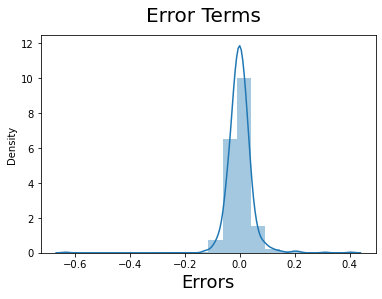

In [439]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b><u>Observations:</b></u>
    We have validated that the error term is normalised around zero thus validating assumption of linear regression.
    

Text(0, 0.5, 'Residuals')

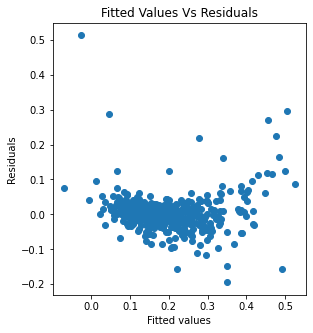

In [440]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Fitted Values Vs Residuals")
plt.scatter(y_test_pred, (y_test-y_test_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

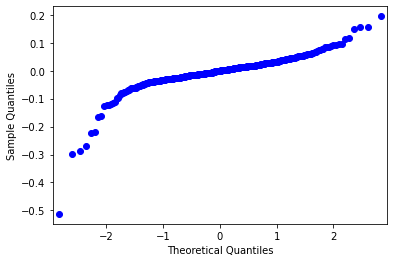

In [441]:
residuals = y_test_pred - y_test
residuals = np.array(residuals)
sm.qqplot(residuals)
plt.show()

Text(0, 0.5, 'y_train_pred')

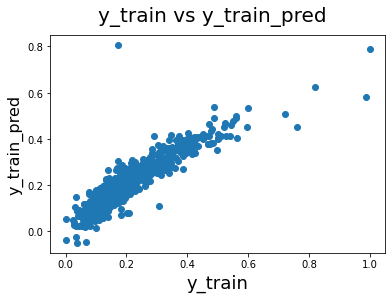

In [442]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)  

In [443]:
y_test_pred = lr_2.predict(X_test_lm)

Text(0, 0.5, 'y_test_pred')

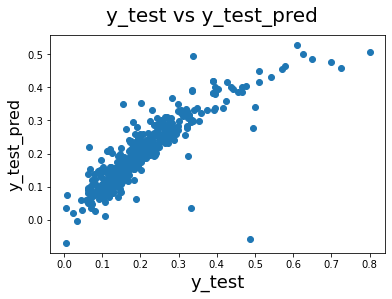

In [444]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

<b><u>Observations:</b></u>
    We have created a model where it predicted target variable in both the train and test dataset fairly accurate. 

In [445]:
r2_score(y_test, y_test_pred)

0.7460377433644599

<b><u>Observations:</b></u>
    We have created a model where it predicted target variable in both the train and test dataset fairly accurate. 

In [446]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_pred))
print(rss)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

1.3804934223705343
0.0031518114665993933
0.05614099630928715


In [447]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_2,y_train)
y_train_pred = ridge.predict(X_train_2)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test_2)
print(r2_score(y_test,y_test_pred))


0.8239216281283475
0.7539676242806989


In [448]:
lambdas = [0,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    ridgereg = Ridge(alpha = i) 
    ridgereg.fit(X_train_2, y_train)
    y_train_pred = ridgereg.predict(X_train_2)
    print("alpha=" + str(i))
    print(r2_score(y_train,y_train_pred))
    y_test_pred = ridgereg.predict(X_test_2)
    print(r2_score(y_test,y_test_pred))
    

alpha=0
0.8240577613520423
0.7460377433644596
alpha=0.0001
0.8240577607303488
0.746055260958653
alpha=0.001
0.824057699338554
0.7462125926484233
alpha=0.01
0.8240517121767306
0.7477541716933374
alpha=0.1
0.8235752847089621
0.7604993828478901
alpha=1
0.810970113663285
0.795722020177504
alpha=10
0.7485778022262578
0.7489379867009731
alpha=100
0.46695531943743096
0.4566733706172159
alpha=1000
0.09199551076006185
0.08889721097334158


In [449]:
folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0,0.0001,0.0002,0.0003,0.0005,0.001,0.01,0.1,1,1.5,1.55,1.60,1.70,1.75,2,2.25,2.5,2.75,3,10,100]}
model=Ridge()
model_cv= GridSearchCV(estimator=model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train_2,y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0, 0.0001, 0.0002, 0.0003, 0.0005, 0.001,
                                   0.01, 0.1, 1, 1.5, 1.55, 1.6, 1.7, 1.75, 2,
                                   2.25, 2.5, 2.75, 3, 10, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [450]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004760,0.004174,0.002408,0.003678,0.0000,{'alpha': 0},0.812154,0.195897,0.861590,0.523237,0.848872,0.834346,0.798617,0.667141,0.804432,0.876168,0.722245,0.202994,20,0.821618,0.879311,0.819667,0.822935,0.81672,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881
1,0.007085,0.006491,0.002707,0.004893,0.0001,{'alpha': 0.0001},0.812167,0.195925,0.861591,0.523254,0.848873,0.834360,0.798647,0.667145,0.804453,0.876168,0.722258,0.202988,19,0.821618,0.879311,0.819667,0.822935,0.81672,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881
2,0.004714,0.006264,0.003934,0.006325,0.0002,{'alpha': 0.0002},0.812180,0.195953,0.861592,0.523271,0.848874,0.834375,0.798678,0.667149,0.804474,0.876168,0.722271,0.202983,18,0.821618,0.879311,0.819667,0.822935,0.81672,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881
3,0.005981,0.005345,0.003597,0.006174,0.0003,{'alpha': 0.0003},0.812193,0.195980,0.861593,0.523288,0.848875,0.834390,0.798708,0.667154,0.804495,0.876168,0.722284,0.202977,17,0.821618,0.879311,0.819667,0.822935,0.81672,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881
4,0.004536,0.003782,0.004005,0.003613,0.0005,{'alpha': 0.0005},0.812220,0.196036,0.861595,0.523322,0.848877,0.834419,0.798768,0.667163,0.804536,0.876168,0.722310,0.202966,16,0.821618,0.879311,0.819667,0.822935,0.81672,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881


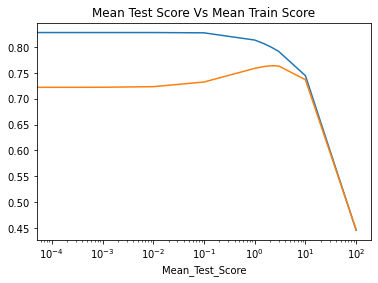

In [451]:
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.title('Mean Test Score Vs Mean Train Score')
plt.xlabel('Mean_TRain_Score')
plt.xlabel('Mean_Test_Score')
plt.show()


In [452]:
model_cv.best_params_

{'alpha': 2.25}

<b><u>Observations:</b></u>
    By looking at the graph and cross validation results, we see alpha value of 2.25 is ideal for ridge regularisation. 
    

In [454]:
ridgereg = Ridge(alpha = 2.25) 
ridgereg.fit(X_train_2, y_train)
y_train_pred = ridgereg.predict(X_train_2)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridgereg.predict(X_test_2)
print(r2_score(y_test,y_test_pred))
cols = housing_train.columns
    

0.7971113175422879
0.7948098449260966


In [455]:
betas = pd.DataFrame(index=X_train_2.columns)
betas.rows = X_train_2.columns
betas['Ridge'] = ridge.coef_

In [456]:
betas_sorted = betas.sort_values(by='Ridge')

In [457]:
betas_sorted

,Ridge
Condition2_PosN,-0.518823
Heating_OthW,-0.123835
PoolArea,-0.097085
KitchenAbvGr,-0.080469
BedroomAbvGr,-0.045747
Exterior1st_Stone,-0.038836
Functional_Sev,-0.037865
Foundation_Slab,0.013263
Exterior1st_BrkComm,0.027217
OverallCond,0.043362


In [458]:
folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0,0.0001,0.001,0.01,0.1,1,10,100]}
model=Lasso()
model_cv= GridSearchCV(estimator=model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train_2,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [459]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031066,0.006411,0.002412,0.003685,0.0000,{'alpha': 0},0.812154,0.195897,0.861590,0.523237,0.848872,0.834346,0.798617,0.667141,0.804432,0.876168,0.722245,0.202994,3,0.821618,0.879311,0.819667,0.822935,0.816720,0.821764,0.821128,0.837891,0.823743,0.817993,0.828277,0.017881
1,0.004698,0.007177,0.003126,0.006253,0.0001,{'alpha': 0.0001},0.855873,0.290287,0.856967,0.572284,0.851110,0.867882,0.868671,0.681681,0.838432,0.855861,0.753905,0.180918,1,0.811058,0.872897,0.811633,0.814144,0.808321,0.810704,0.810537,0.830601,0.812769,0.808699,0.819136,0.018920
2,0.007759,0.006091,0.002380,0.005043,0.0010,{'alpha': 0.001},0.818738,0.581923,0.810060,0.623666,0.798292,0.820888,0.813274,0.706674,0.744678,0.764500,0.748269,0.081234,2,0.742036,0.787456,0.746609,0.766028,0.740445,0.743351,0.745104,0.751437,0.746146,0.746227,0.751484,0.013796
3,0.006259,0.007665,0.001562,0.004687,0.0100,{'alpha': 0.01},0.337965,0.213539,0.386819,0.367581,0.263756,0.299347,0.362363,0.261965,0.310668,0.256776,0.306078,0.054115,4,0.304127,0.290023,0.320335,0.321459,0.282253,0.302287,0.307830,0.296341,0.317332,0.310794,0.305278,0.012344
4,0.004690,0.007164,0.000000,0.000000,0.1000,{'alpha': 0.1},-0.010958,-0.010191,-0.000095,-0.000009,-0.044835,-0.002481,-0.005662,-0.001807,-0.001329,-0.000991,-0.007836,0.012901,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


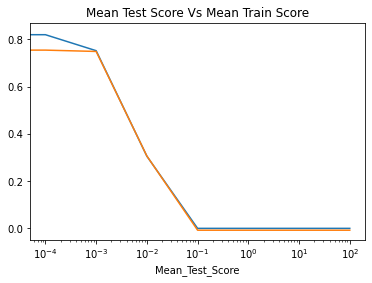

In [460]:
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.title('Mean Test Score Vs Mean Train Score')
plt.xlabel('Mean_TRain_Score')
plt.xlabel('Mean_Test_Score')
plt.show()

In [461]:
model_cv.best_params_

{'alpha': 0.0001}

<b><u>Observations:</b></u>
    By looking at the graph and cross validation results, we see alpha value of 0.0001 is ideal for Lasso regularisation. 

In [462]:
lambdas = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_2, y_train)
    y_train_pred = lassoreg.predict(X_train_2)
    print("r2 score = " + str(r2_score(y_train, y_train_pred)))
    print(lassoreg.coef_)
    y_test_pred = lassoreg.predict(X_test_2)
    print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.8238965025076885
[ 0.0551262   0.1305206   0.22224891  0.0427237   0.06531385  0.10066824
  0.11411558  0.48485003  0.1614379  -0.04602269 -0.08002035 -0.09577903
 -0.53533918  0.11766058  0.13496432  0.15196218  0.09602731  0.06536806
  0.21829654  0.02118511 -0.03081216  0.04952267  0.01267767 -0.12011883
 -0.03315495  0.05264586]
Test r2 score = 0.7517809210609716
r2 score = 0.814615393277449
[ 0.03474871  0.10475147  0.23481208  0.03799501  0.06426326  0.10380057
  0.09719678  0.44534638  0.14170707 -0.02059375 -0.06247559 -0.04952369
 -0.40740372  0.05265792  0.          0.          0.          0.
  0.14248472 -0.         -0.          0.00931306  0.00232623 -0.02996762
 -0.          0.00824738]
Test r2 score = 0.7806703040817947
r2 score = 0.7502019763577353
[ 0.          0.          0.27938622  0.          0.03350011  0.10746001
  0.00419699  0.30879555  0.08700968  0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.      

In [463]:
lambdas =0.0001
lassoreg = Lasso(alpha = lambdas)
lassoreg.fit(X_train_2, y_train)
y_train_pred = lassoreg.predict(X_train_2)
print("r2 score = " + str(r2_score(y_train, y_train_pred)))
print(lassoreg.coef_)
y_test_pred = lassoreg.predict(X_test_2)
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.814615393277449
[ 0.03474871  0.10475147  0.23481208  0.03799501  0.06426326  0.10380057
  0.09719678  0.44534638  0.14170707 -0.02059375 -0.06247559 -0.04952369
 -0.40740372  0.05265792  0.          0.          0.          0.
  0.14248472 -0.         -0.          0.00931306  0.00232623 -0.02996762
 -0.          0.00824738]
Test r2 score = 0.7806703040817947


In [464]:
betas['Lasso'] = lassoreg.coef_

In [465]:
betas

,Ridge,Lasso
LotFrontage,0.057909,0.034749
LotArea,0.132250,0.104751
OverallQual,0.222977,0.234812
OverallCond,0.043362,0.037995
MasVnrArea,0.065844,0.064263
BsmtQual,0.100854,0.103801
BsmtFinSF1,0.115566,0.097197
1stFlrSF,0.480093,0.445346
2ndFlrSF,0.160656,0.141707
BedroomAbvGr,-0.045747,-0.020594


# Subjective Questions:

## Question 1:


In [466]:
# Optimal Value of alpha in Ridge Regression is 2.25
# Optimal value of alpha in Lasso Regression is 0.0001
# Let us double the alpha value and see the effects. 


In [467]:
# We doubled the alpha in Ridge regression from 2.25 to 4.5 

i = 4.5
ridge = Ridge(alpha=i)

ridge.fit(X_train_2, y_train)
print(ridge.coef_)


[ 6.94024678e-02  7.08467647e-02  2.36019553e-01  3.33139182e-02
  8.28487548e-02  1.25542982e-01  9.29149671e-02  2.41898056e-01
  9.56742560e-02  1.94699578e-02 -4.04981635e-02 -1.11905164e-02
 -7.44248352e-02  1.50439047e-02  1.02923722e-02  1.20208789e-02
 -3.16307782e-03  1.08422130e-06  7.64668809e-02 -7.58088370e-03
  9.20820432e-03  1.69121107e-02  1.91484509e-03 -2.21186021e-02
 -2.05489283e-02  2.13495445e-02]


In [468]:
betas['Ridge_2X'] = ridge.coef_

In [469]:
    i = 0.0002
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_2, y_train)
    y_train_pred = lassoreg.predict(X_train_2)
    print("r2 score = " + str(r2_score(y_train, y_train_pred)))
    print(lassoreg.coef_)
    y_test_pred = lassoreg.predict(X_test_2)
    print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.8044733788134643
[ 0.01657762  0.07065649  0.24325647  0.03208084  0.06168469  0.10634906
  0.08320818  0.41667389  0.12671154 -0.         -0.05250884 -0.
 -0.27445458  0.03099861  0.          0.          0.         -0.
  0.10711439 -0.          0.          0.          0.         -0.
 -0.          0.        ]
Test r2 score = 0.7915882852921845


In [470]:
betas['Lasso_2X'] = lassoreg.coef_

In [471]:
betas_sorted = betas.sort_values(by='Lasso')

In [472]:
betas_sorted

,Ridge,Lasso,Ridge_2X,Lasso_2X
Condition2_PosN,-0.518823,-0.407404,-0.074425,-0.274455
KitchenAbvGr,-0.080469,-0.062476,-0.040498,-0.052509
PoolArea,-0.097085,-0.049524,-0.011191,-0.000000
Heating_OthW,-0.123835,-0.029968,-0.022119,-0.000000
BedroomAbvGr,-0.045747,-0.020594,0.019470,-0.000000
Exterior1st_Stone,-0.038836,-0.000000,0.009208,0.000000
Exterior1st_BrkComm,0.027217,-0.000000,-0.007581,-0.000000
RoofMatl_WdShake,0.072497,0.000000,0.000001,-0.000000
RoofMatl_Roll,0.104062,0.000000,-0.003163,0.000000
RoofMatl_Metal,0.157008,0.000000,0.012021,0.000000


# Question 3 : 

## Top 5 Features from Lasso regression are 

- 1stFlrSF
- Condition2_PosN
- OverallQual
- RoofMatl_WdShngl
- 2ndFlrSF


In [473]:
# Question 3 : 
# if the top 5 features are not available in the input, what are the other top 5 features influencing price of the house. 
X_train_3 = X_train_2.drop(['1stFlrSF','Condition2_PosN','OverallQual','RoofMatl_WdShngl','2ndFlrSF'],axis=1)




In [474]:
X_test_3 = X_test_2.drop(['1stFlrSF','Condition2_PosN','OverallQual','RoofMatl_WdShngl','2ndFlrSF'],axis=1)

In [475]:
folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0,0.0001,0.001,0.01,0.1,1,10,100]}
model=Lasso()
model_cv= GridSearchCV(estimator=model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train_3,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [476]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.026822,0.005529,0.003013,0.003736,0.0000,{'alpha': 0},0.579658,0.182146,0.598337,0.561606,0.573213,0.671937,0.602769,0.421537,0.718394,0.625380,0.553498,0.143972,2,0.604619,0.644044,0.603211,0.606883,0.604417,0.596651,0.602487,0.616322,0.590509,0.599513,0.606865,0.013933
1,0.006630,0.003457,0.001983,0.003142,0.0001,{'alpha': 0.0001},0.583465,0.251026,0.605020,0.565868,0.564773,0.662398,0.597672,0.458733,0.723355,0.606902,0.561921,0.122109,1,0.600517,0.639531,0.599354,0.602976,0.600356,0.592861,0.599445,0.612050,0.586270,0.595986,0.602935,0.013738
2,0.003203,0.003923,0.005052,0.005020,0.0010,{'alpha': 0.001},0.548408,0.443487,0.584691,0.562917,0.511844,0.559652,0.536627,0.473444,0.636971,0.478796,0.533684,0.055026,3,0.546268,0.562859,0.545874,0.547968,0.547485,0.540474,0.546554,0.549625,0.532191,0.547174,0.546647,0.007227
3,0.006048,0.004712,0.001896,0.003165,0.0100,{'alpha': 0.01},0.295685,0.193208,0.334036,0.325246,0.232950,0.256404,0.312203,0.232458,0.273900,0.217635,0.267373,0.045985,4,0.257085,0.268888,0.268371,0.263720,0.255363,0.273738,0.266207,0.257758,0.263380,0.281074,0.265558,0.007562
4,0.004568,0.003802,0.004177,0.004993,0.1000,{'alpha': 0.1},-0.010958,-0.010191,-0.000095,-0.000009,-0.044835,-0.002481,-0.005662,-0.001807,-0.001329,-0.000991,-0.007836,0.012901,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


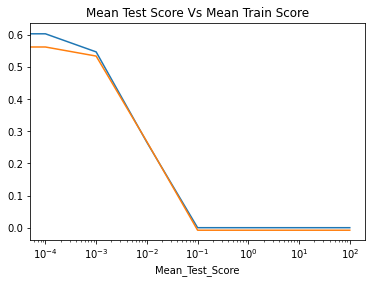

In [477]:
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.title('Mean Test Score Vs Mean Train Score')
plt.xlabel('Mean_TRain_Score')
plt.xlabel('Mean_Test_Score')

plt.show()

In [478]:
model_cv.best_params_

{'alpha': 0.0001}

In [479]:
lambdas = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_3, y_train)
    y_train_pred = lassoreg.predict(X_train_3)
    print("r2 score = " + str(r2_score(y_train, y_train_pred)))
    print(lassoreg.coef_)
    y_test_pred = lassoreg.predict(X_test_3)
    print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.6035735710275552
[ 0.16510133  0.25293633  0.07472926  0.21127643  0.26490454  0.14927581
  0.16645631 -0.06034088  0.02869937 -0.01115572  0.01222198  0.05892346
 -0.0712429   0.         -0.04541958  0.098105    0.01792711 -0.00259902
 -0.00459304 -0.11290098  0.11705164]
Test r2 score = 0.623517673662354
r2 score = 0.599575719067662
[ 0.16653182  0.22536448  0.07137944  0.20484324  0.26477218  0.15060782
  0.15326481 -0.05355934  0.00220202 -0.00192748  0.          0.
 -0.          0.         -0.          0.06467538  0.         -0.00063077
 -0.         -0.01069449  0.06890212]
Test r2 score = 0.6189401835866836
r2 score = 0.5454989033977831
[ 0.11141222  0.          0.01513155  0.16967436  0.26065375  0.06912659
  0.0663155  -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.        ]
Test r2 score = 0.548477301646334
r2 score = 0.2656452909368249
[ 0.          0.         -0.   

In [480]:
    i = 0.0001
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_3, y_train)
    y_train_pred = lassoreg.predict(X_train_3)
    print("r2 score = " + str(r2_score(y_train, y_train_pred)))
    print(lassoreg.coef_)
    y_test_pred = lassoreg.predict(X_test_3)
    print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.599575719067662
[ 0.16653182  0.22536448  0.07137944  0.20484324  0.26477218  0.15060782
  0.15326481 -0.05355934  0.00220202 -0.00192748  0.          0.
 -0.          0.         -0.          0.06467538  0.         -0.00063077
 -0.         -0.01069449  0.06890212]
Test r2 score = 0.6189401835866836


In [481]:
betas_new = pd.DataFrame(index=X_train_3.columns)
betas_new.rows = X_train_3.columns
betas_new['Lasso'] = lassoreg.coef_

In [482]:
betas_new_sorted = betas_new.sort_values(by='Lasso')

In [483]:
betas_new_sorted

,Lasso
KitchenAbvGr,-0.053559
Functional_Sev,-0.010694
RoofMatl_CompShg,-0.001927
Foundation_Slab,-0.000631
RoofMatl_Membran,0.000000
Heating_OthW,-0.000000
Exterior2nd_Stone,0.000000
Exterior1st_BrkComm,-0.000000
RoofMatl_WdShake,0.000000
RoofMatl_Metal,0.000000


<b><u>Observations:</b></u>

Below are the top 5 features after the best 5 parameters have been removed.

- BsmtQual
- LotArea
- MasVnrArea
- LotFrontage
- BedroomAbvGr
